# 模式识别第一次作业

生成两个均包含 N =1000个两维随机矢量的数据集合 X和 X'，数据集合中的随机矢量来自于三个模型，它们分别满足均值矢量为m1=[1,1]^T, m_2=[4,4]^T, m_3=[8,1]^T和协方差矩阵为S_1=S_2=S_3=2I的正态分布， 其中I是 2*2的单位矩阵。在生成数据集合 X时，假设类别的先验概率相同； 而在生成数据集合 X 时，假设类别的先验概率由矢量P = 〖[0.6,0.3,0.1]〗^T 给出。 分别画出两个数据集合的随机矢量散布图； 使用数据集合X，分别估计属于三个模型随机矢量的均值和协方差矩阵； 解释模型与参数估计值间存在差异的原因。

使用作业一所生成的两个数据集合， 完成下述工作：

在两个数据集合上分别应用“似然率测试规则”、“贝叶斯风险规则”（其中C_12 = 2， C_13 = 3， C_23=2.5， C_11=C_22=C_33=0 ， C_21=C_31=C_32=1、“最大后验概率规 则” 和“最短欧氏距离规则” 进行模式分类实验， 给出实验过程设计和实验结果。
对每个数据集合给出每种分类器的分类错误率，并给出你的结论。

In [59]:
import numpy as np
import random as ran
import matplotlib.pyplot as plt
import math

## 数据集准备

In [89]:
N=1000
mu1=[1,1]
mu2=[4,4]
mu3=[8,1]
sigma=[[2,0],[0,2]]

# 数据集X1
X1_1_num, X1_2_num, X1_3_num = 0, 0, 0
for dataNum in range(0,N):
    k = ran.randint(1,3)
    if k==1:
        X1_1_num += 1
    elif k==2:
        X1_2_num += 1
    else:
        X1_3_num += 1
x11,y11 = np.random.multivariate_normal(mu1, sigma, X1_1_num).T
x12,y12 = np.random.multivariate_normal(mu2, sigma, X1_2_num).T
x13,y13 = np.random.multivariate_normal(mu3, sigma, X1_3_num).T
# print(x11.shape,y11.shape)
# print(x12.shape,y12.shape)
# print(x13.shape,y13.shape)

(320,) (320,)


In [73]:
# 数据集X2
X2_1_num, X2_2_num, X2_3_num = 0, 0, 0
for dataNum in range(0,N):
    k=ran.randint(1,10)
    if k<=6:
        X2_1_num += 1
    elif k<=9:
        X2_2_num += 1
    else:
        X2_3_num += 1
x21,y21 = np.random.multivariate_normal(mu1, sigma, X2_1_num).T
x22,y22 = np.random.multivariate_normal(mu2, sigma, X2_2_num).T
x23,y23 = np.random.multivariate_normal(mu3, sigma, X2_3_num).T
print(x21.shape,y21.shape)
print(x22.shape,y22.shape)
print(x23.shape,y23.shape)

(595,) (595,)
(297,) (297,)
(108,) (108,)


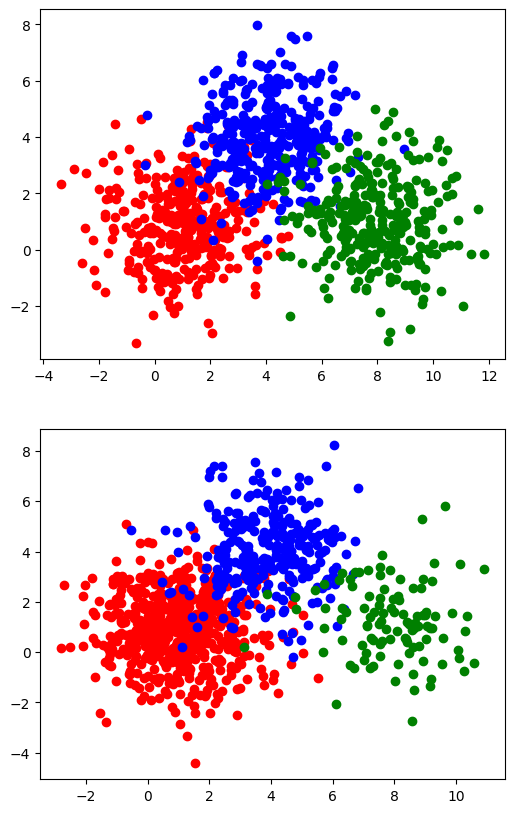

In [74]:
# 画图
fig, axs = plt.subplots(2, 1,  figsize=(6, 10))
axs[0].scatter(x11, y11, c='red')
axs[0].scatter(x12, y12, c='blue')
axs[0].scatter(x13, y13, c='green')
axs[1].scatter(x21, y21, c='red')
axs[1].scatter(x22, y22, c='blue')
axs[1].scatter(x23, y23, c='green')

In [83]:
# 计算平均值，协方差
def compute_mean_cov(x,y):
    X = np.vstack((x,y))
    cov = np.cov(X)
    mean = np.mean(X,axis=1)
    return mean, cov

X1_1_mean, X1_1_cov = compute_mean_cov(x11, y11)
X1_2_mean, X1_2_cov = compute_mean_cov(x12, y12)
X1_3_mean, X1_3_cov = compute_mean_cov(x13, y13)
X2_1_mean, X2_1_cov = compute_mean_cov(x21, y21)
X2_2_mean, X2_2_cov = compute_mean_cov(x22, y22)
X2_3_mean, X2_3_cov = compute_mean_cov(x23, y23)

def getParameters(mean1, mean2, mean3, cov1, cov2, cov3):
    mu = np.vstack((mean1, mean2, mean3))
    sigma = np.zeros((3, 2, 2))
    sigma[0], sigma[1], sigma[2] = cov1, cov2, cov3
    return mu, sigma

mean_X1, sigma_X1 = getParameters(X1_1_mean, X1_2_mean, X1_3_mean, X1_1_cov, X1_2_cov, X1_3_cov)
mean_X2, sigma_X2 = getParameters(X2_1_mean, X2_2_mean, X2_3_mean, X2_1_cov, X2_2_cov, X2_3_cov)

X1_data = np.hstack((np.vstack((x11, y11)), np.vstack((x12, y12)), np.vstack((x13, y13)))).T
X2_data = np.hstack((np.vstack((x21, y21)), np.vstack((x22, y22)), np.vstack((x23, y23)))).T

# 分类标签
label_X1_data = np.zeros(N)
label_X1_data[X1_1_num:X1_1_num + X1_2_num - 1] = 1
label_X1_data[-X1_3_num:] = 2
# label_X1_data = map(int, label_X1_data)

label_X2_data = np.zeros(N)
label_X2_data[X2_1_num:X2_1_num + X2_2_num - 1] = 1
label_X2_data[-X2_3_num:] = 2
# label_X2_data = map(int, label_X2_data)
# print(type(label_X1_data))

## 似然率测试规则

In [91]:
K=3

# 先验概率
PrioPro_X1 = np.array((X1_1_num, X1_2_num, X1_3_num)) / 1000.
PrioPro_X2 = np.array((X2_1_num, X2_2_num, X2_3_num)) / 1000.

def getPosterPro(K,data,sigma,mu,PrioPro):
    m,n=np.shape(data)
    Px_w = np.mat(np.zeros((m, K)))
    for i in range(K):
        coef = (2 * math.pi) ** (-n / 2.) * (np.linalg.det(sigma[i]) ** (-0.5))
        temp=np.multiply((data-mu[i])*np.mat(sigma[i]).I,data-mu[i])
        Xshift = np.sum(temp, axis=1)
        Px_w[:,i]= coef * np.exp(Xshift*-0.5)  #矩阵与常数相乘
    PosterPro=np.mat(np.zeros((m,K)))
    for i in range(K):
        PosterPro[:,i]=PrioPro[i]*Px_w[:,i]
    return PosterPro

def getLikelihoodLabel(PosterPro):
    outputLabel = np.argmax(PosterPro, axis=1)
    outputLabel = np.array(outputLabel.flatten())[0]
    # outputLabel = map(int, np.array(outputLabel.flatten())[0])
    return outputLabel

def getErrorRate(N,label,outputLabel):
    errorNum = int(np.shape(np.nonzero(np.array(outputLabel) - np.array(label)))[1])
    errorRate = float(errorNum) / N
    return errorRate

PosterPro_data1=getPosterPro(K,X1_data,sigma_X1,mean_X1,PrioPro_X1)
likelihoodLabel=getLikelihoodLabel(PosterPro_data1)
errorRate_data1_likelihood=getErrorRate(N,label_X1_data,likelihoodLabel)

PosterPro_data2=getPosterPro(K,X2_data,sigma_X2,mean_X2,PrioPro_X2)
likelihoodLabel_data2=getLikelihoodLabel(PosterPro_data2)
errorRate_data2_likelihood=getErrorRate(N,label_X2_data,likelihoodLabel_data2)

In [92]:
PosterPro_data1, likelihoodLabel, errorRate_data1_likelihood

(matrix([[1.95287473e-02, 9.82573573e-05, 1.49404797e-08],
         [1.11907940e-02, 1.66177430e-03, 1.96559589e-07],
         [1.60297855e-02, 3.02850697e-03, 3.29456138e-06],
         ...,
         [6.81187159e-06, 4.07685921e-03, 7.06057430e-03],
         [1.03092365e-07, 2.69103858e-04, 1.22832965e-02],
         [1.80361325e-08, 7.15373240e-05, 1.20205150e-02]]),
 array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## 贝叶斯风险规则

In [93]:
K=3

def getBayesLabel(PosterPro):
    Cost = [[0, 2, 3], 
            [1, 0, 2.5], 
            [1, 1, 0]]
    M=np.shape(PosterPro)[0]
    BayesLabel = np.zeros(M)
    for m in range(M):
        for i in range(K):
            flag = True
            for j in range(i + 1, K):
                temp = (Cost[j][i] - Cost[i][i]) * np.array(PosterPro)[m][i] - \
                       (Cost[i][j] - Cost[j][j]) * np.array(PosterPro)[m][j]
                if temp < 0: flag = False
            if flag == True:
                BayesLabel[m] = i
                break
            else:
                BayesLabel[m] = j
                continue
    return BayesLabel

# X1数据集
PosterPro_data1=getPosterPro(K,X1_data,sigma_X1,mean_X1,PrioPro_X1)
BayesLabel_data1=getBayesLabel(PosterPro_data1)
errorRate_X1_Bayesian=getErrorRate(N,label_X1_data,BayesLabel_data1)

# X2数据集
PosterPro_data2=getPosterPro(K,X2_data,sigma_X2,mean_X2,PrioPro_X2)
BayesLabel_data2=getBayesLabel(PosterPro_data2)
errorRate_X2_Bayesian=getErrorRate(N,label_X2_data,BayesLabel_data2)

In [94]:
PosterPro_data1, BayesLabel_data1, errorRate_X1_Bayesian

(matrix([[1.95287473e-02, 9.82573573e-05, 1.49404797e-08],
         [1.11907940e-02, 1.66177430e-03, 1.96559589e-07],
         [1.60297855e-02, 3.02850697e-03, 3.29456138e-06],
         ...,
         [6.81187159e-06, 4.07685921e-03, 7.06057430e-03],
         [1.03092365e-07, 2.69103858e-04, 1.22832965e-02],
         [1.80361325e-08, 7.15373240e-05, 1.20205150e-02]]),
 array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.,
        0., 0., 0., 0.

## 最大后验概率规则

In [96]:
K=3

# 先验概率
PrioPro_X1 = np.array((X1_1_num, X1_2_num, X1_3_num)) / 1000.
PrioPro_X2 = np.array((X2_1_num, X2_2_num, X2_3_num)) / 1000.

def getPosterPro(K,data,sigma,mu,PrioPro):
    m,n=np.shape(data)
    Px_w = np.mat(np.zeros((m, K)))
    for i in range(K):
        coef = (2 * math.pi) ** (-n / 2.) * (np.linalg.det(sigma[i]) ** (-0.5))
        temp=np.multiply((data-mu[i])*np.mat(sigma[i]).I,data-mu[i])
        Xshift = np.sum(temp, axis=1)
        Px_w[:,i]= coef * np.exp(Xshift*-0.5)  #矩阵与常数相乘
    PosterPro=np.mat(np.zeros((m,K)))
    for i in range(K):
        PosterPro[:,i]=PrioPro[i]*Px_w[:,i]
    return PosterPro

def getLikelihoodLabel(PosterPro):
    outputLabel = np.argmax(PosterPro, axis=1)
    outputLabel = np.array(outputLabel.flatten())[0]
    # outputLabel = map(int, np.array(outputLabel.flatten())[0])
    return outputLabel

def getErrorRate(N,label,outputLabel):
    errorNum = int(np.shape(np.nonzero(np.array(outputLabel) - np.array(label)))[1])
    errorRate = float(errorNum) / N
    return errorRate

PosterPro_data1 = getPosterPro(K,X1_data,sigma_X1,mean_X1,PrioPro_X1)
likelihoodLabel = getLikelihoodLabel(PosterPro_data1)
errorRate_data1_MaxPost = getErrorRate(N,label_X1_data,likelihoodLabel)

PosterPro_data2 = getPosterPro(K,X2_data,sigma_X2,mean_X2,PrioPro_X2)
likelihoodLabel_data2 = getLikelihoodLabel(PosterPro_data2)
errorRate_data2_MaxPost = getErrorRate(N,label_X2_data,likelihoodLabel_data2)

## 最短欧氏距离规则

In [99]:
N=1000
K=3
def getDistanced(vec1,vec2):
    return math.sqrt(np.sum(np.power(vec1-vec2, 2)))

def getLabel(data,K,mean_X):
    m, n = np.shape(data)
    clusterAssment = np.zeros(m)
    centroids = np.mat(mean_X)
    for i in range(m):
        minDist = np.inf
        minIndex = -1
        for j in range(K):
            dist = getDistanced(data[i,:], centroids[j,:])
            if dist < minDist:
                minDist = dist
                minIndex = j
        if clusterAssment[i] != minIndex:
            clusterAssment[i] = minIndex
    return centroids, clusterAssment

centroids1, clusterAssment1 = getLabel(X1_data, K, mean_X1)
errorRate_X1 = getErrorRate(N, label_X1_data, clusterAssment1)

centroids2, clusterAssment2 = getLabel(X2_data, K,mean_X2)
errorRate_X2 = getErrorRate(N, label_X2_data, clusterAssment2)


print('The error rate of Likelihood Rate rule is(X1)',errorRate_data1_likelihood)
print('The error rate of Bayesian risk rule is (X1)',errorRate_X1_Bayesian)
print('The error rate of Maximum Posteriori Probability rule is(X1)',errorRate_data1_MaxPost)
print('The error rate of Minimum European distance rule(X1) is ',errorRate_X1)
print('\n')
print('The error rate of Likelihood Rate rule is(X2)',errorRate_data2_likelihood)
print('The error rate of Bayesian risk rule is (X2)',errorRate_X2_Bayesian)
print('The error rate of Maximum Posteriori Probability rule is(X2)',errorRate_data2_MaxPost)
print('The error rate of Minimum European distance rule(X2) is ',errorRate_X2)

The error rate of Likelihood Rate rule is(X1) 0.069
The error rate of Bayesian risk rule is (X1) 0.077
The error rate of Maximum Posteriori Probability rule is(X1) 0.069
The error rate of Minimum European distance rule(X1) is  0.067


The error rate of Likelihood Rate rule is(X2) 0.071
The error rate of Bayesian risk rule is (X2) 0.077
The error rate of Maximum Posteriori Probability rule is(X2) 0.071
The error rate of Minimum European distance rule(X2) is  0.08
